# Competence in Statistical Analysis
In this notebook, I'll be examining a dataset that I've collected from the UCI (link to dataset here: https://archive.ics.uci.edu/ml/datasets/Student+Performance) and will attempt to extract as much information from it as possible using statistical techniques.

In [1]:
# First, we'll start off with a Pandas read-in.
import pandas as pd
df1 = pd.read_csv('student-mat.csv', sep=';')
df2 = pd.read_csv('student-por.csv', sep=';')
#Since the zip file came in two different CSVs, we'll be attempting a merge on them.
#Also, to make sure that our end-product after the merge is valid, we'll be basing it off the shape.
print(df1.shape)
df1.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [2]:
print(df2.shape)
df2.head()

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
df = pd.concat([df1, df2], axis = 0)
#After concatanating, we can verify our final shape is accurate by df1+df2's row-count. It should equal (1044, 33).
print(df.shape)
df.head()

(1044, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Since we are finished with our concat, we can now analyze our dataset and see what exactly we can start with and determine which approaches would either be appropriate or inappropriate.

In [4]:
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044,1044,1044,1044,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,772,591,NaN,759,738,923,NaN,NaN,399,584,430,728,NaN,NaN,NaN,925,640,824,528,835,955,827,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,NaN,NaN,1.522989,1.970307,0.264368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,NaN,NaN,0.731727,0.834353,0.656142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


In [5]:
df['sex'].value_counts()

F    591
M    453
Name: sex, dtype: int64

In [6]:
#Since it's easier to encode BEFORE we do a split, all encoding will be done in this cell.
#Normally I would just OHE, but since I still want some values to be strings and I won't need everything encoded,
#I will just do it manually.
df = df.replace('U', 0)
df = df.replace('R', 1)
df = df.replace('yes', 1)
df = df.replace('no', 0)

In [7]:
#Since sex is binary and both have fairly significant value counts, we could use this as a basis to form several hypotheses.
men = df[df['sex'] == 'M']
women = df[df['sex']=='F']
men.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
5,GP,M,16,0,LE3,T,4,3,services,other,reputation,mother,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,0,LE3,T,2,2,other,other,home,mother,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,0,LE3,A,3,2,services,other,home,mother,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,0,GT3,T,3,4,other,other,home,mother,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15
12,GP,M,15,0,LE3,T,4,4,health,services,course,father,1,1,0,0,1,1,1,1,1,1,0,4,3,3,1,3,5,2,14,14,14


I'd like to start off with a T-Test approach. T-tests is a simple, yet very effective, way to prove that a variable is more likely to apply to one group than it is to apply to another, or, in some cases, to differ from each other.
The formula would usually appear as this for one sample T-tests:

## t = ( x̄ – μ) / (s / √n)

x = Observed mean of the sample

μ = Theoretical Mean of the Population

s = Standard Deviation of the Sample

n = Sample Size


while in two sample T-tests, it would appear as this:

## t = ( x̄1 – x̄2) / √ [(s21 / n 1 ) + (s22 / n 2 )]


x̄1 = Observed Mean of 1st Sample

x̄2 = Observed Mean of 2nd Sample

s1 = Standard Deviation of 1st Sample

s2= Standard Deviation of 2nd Sample

n 1 = Size of 1st Sample

n 2 = Size of 2nd Sample


Null hypothesis (The hypothesis that we are attempting to reject): Men and women both are predisposed to equally live in rural and urban areas.

Alternative hypothesis (the theory we will alternatively accept if we successfully reject our Null hypothesis): Men are predisposed to live in either urban or rural areas as opposed to women.

Confidence level (The percentage we have to beat with our p-value in order to accept our alternative hypothesis): 90%

In [8]:
from scipy import stats
stats.ttest_ind(men['address'],women['address'], nan_policy='omit')

Ttest_indResult(statistic=-0.37305914448121597, pvalue=0.7091803004686457)

Since we have not reached our confidence level, we have failed to reject our null hypothesis and must accept that our addresses and sex are not strongly correlated. Instead, let's do another one and see if we can find a correlation.

Null hypothesis: men and women participate in extra curricular activities after school equally and there is no significant correlation to prove otherwise.

Alternative hypothesis: one sex is more likely to participate in extra curricular activities than the other sex.

Confidence level: 90%

In [9]:
stats.ttest_ind(men['activities'], women['activities'], nan_policy='omit')

Ttest_indResult(statistic=3.7820435286912675, pvalue=0.00016439162794316413)

We have SUCCESSFULLY beaten our confidence level, meaning that we have successfully rejected our null hypothesis. Since our t-statistic is in the positive, we can claim that women are more likely to participate in extra curricular activities than men.

## A short experiment with the Bayes Formula

Since I can't really find a way to incorporate a bayesian approach to this particular dataset, I'll just write down a function that will automatically calculate a bayesian approach. This whole notebook is mostly just for fun, anyways.


In [10]:
def bayes_func(prob_of_truth, false_positive_rate, true_positive_rate = 1):
  '''
The formula will be as so:
P(H|E) = P(E|H) * P(H) / P(E)
P(E) = P(E|H) * P(H) + P(E|-H) * P(-H)
H = Evidence
Y = Hypothesis
  '''
  actual_positives = prob_of_truth * true_positive_rate
  p_of_false = (1 - prob_of_truth)
  actual_false_positives = p_of_false * false_positive_rate
  denominator = actual_positives + actual_false_positives

  return actual_positives / denominator

In [16]:
count = 1
posterior = bayes_func(1/1000, 0.08)

while posterior < 0.95:
  posterior = bayes_func(posterior, 0.08)
  count += 1

print(f'After {str(count)} runs, we have achieved past our confidence interval of 95% and hit {str(posterior*100)[:2]}%.')

After 4 runs, we have achieved past our confidence interval of 95% and hit 96%.


## Last but not least, let's report our CIs and MOEs with our point estimates.

In [18]:
import numpy as np

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

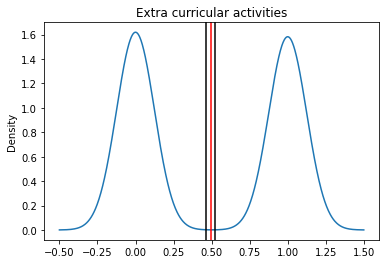

In [22]:
import matplotlib.pyplot as plt
#A good way to see if we did our t-test properly is by running our function on it. Assuming we did it correctly,
#our density plot will shot three lines split right down the middle with an even distribution.
low, mean, up = confidence_interval(df['activities'])
df['activities'].plot.density()
plt.title('Extra curricular activities')
plt.axvline(x=low, color='black')
plt.axvline(x=mean, color='red')
plt.axvline(x=up,color='black')
plt.show()


These results basically mean that not only have we reached our confidence interval correctly, but it's also accurate enough to be left with a very little margin of error, where it's only around .05. That's impressive!

### In conclusion:

Although this may not be the most complex notebook I have ever written, I am hoping that I was able to prove my capabilitiy in statistics. Whether it's chi square t-tests, reporting the MOE, etc., I would say that I am very much comfortable in that world of data science. If you're reading this, I hope to hear from you soon!